Backtest: Trade Imbalance Strategy for BTCUSDT Futures

This project involves the backtesting of a quantitative trading strategy for BTCUSDT futures, utilizing trade imbalance data derived from Binance's aggregate trades feed.

Strategy Logic:
The strategy calculates the trade imbalance (the net difference between buyer-initiated and seller-initiated volume) over a fixed lookback window. A long position is initiated if the imbalance exceeds a predefined threshold. The strategy is long-only, as this configuration demonstrated superior performance compared to a long-short approach during initial testing.

Optimization & Backtest Setup:

Data: Binance aggregate trades data.

Backtesting Engine: VectorBT.

Optimized Parameters: The lookback period (45 minutes) and imbalance threshold were optimized through iterative testing against alternatives (30min, 1hr).

Test Period: 5 months of historical data. Threshold values were calibrated monthly to identify a convergent, robust parameter set.


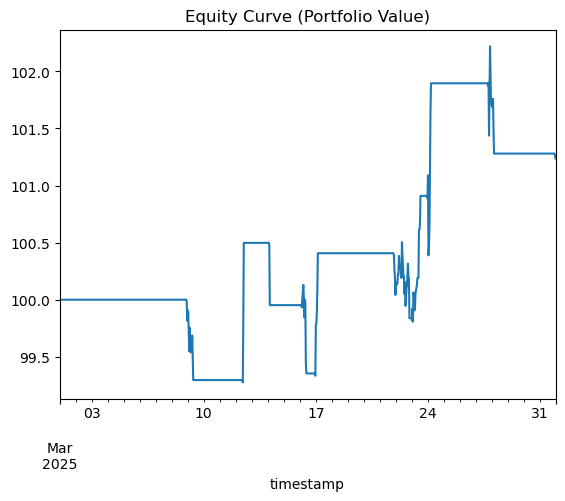

Start                         2025-03-01 00:00:00
End                           2025-03-31 23:15:00
Period                           31 days 00:00:00
Start Value                                 100.0
End Value                               101.23745
Total Return [%]                          1.23745
Benchmark Return [%]                    -1.913645
Max Gross Exposure [%]                      100.0
Total Fees Paid                          0.381368
Max Drawdown [%]                         1.158039
Max Drawdown Duration             8 days 06:45:00
Total Trades                                   10
Total Closed Trades                             9
Total Open Trades                               1
Open Trade PnL                          -0.042458
Win Rate [%]                            44.444444
Best Trade [%]                           1.210622
Worst Trade [%]                          -0.70409
Avg Winning Trade [%]                    1.080413
Avg Losing Trade [%]                    -0.603417


In [16]:
#BACKTEST FOR MARCH 2025


import numpy as np
import pandas as pd
import vectorbt as vbt
import matplotlib.pyplot as plt

df=pd.read_csv(r"C:\Users\HP 840 G4 TOUCH\Downloads\BTCUSDT-aggTrades-2025-03.zip")
#print(df.head())

df["timestamp"]=pd.to_datetime(df["transact_time"], unit="ms")
df["side"]=np.where(df['is_buyer_maker'],'SELL','BUY')
df=df.set_index('timestamp')
window='45min'
agg=df.groupby(pd.Grouper(freq=window)).agg({
    'price':'last',
    'quantity':'sum'
                                             })

#imbalance for the window
imbalance_list=[]
for t,group in df.groupby(pd.Grouper(freq=window)):
    if group.empty:
        imbalance_list.append(np.nan)
        continue
    buys=group.loc[group['side']=='BUY','quantity'].sum()
    sells=group.loc[group['side']=='SELL','quantity'].sum()
    total= buys+ sells
    if total == 0:
        imbalance=0
    else:
        imbalance=(buys-sells)/total * 100
    imbalance_list.append(imbalance)

agg['imbalance']= imbalance_list

#generating entry signals
long_entries= (agg['imbalance']> 22) #& (total>3000)
#short_entries= (agg['imbalance']< -40) #& (total>3000)

#price series
price = agg['price'].ffill()

#run backtest
pf=vbt.Portfolio.from_signals(
    close=price,
    entries=long_entries,
    #short_entries=short_entries,
    size=1.0,

    fees=0.0002,
    sl_stop=0.005,
    tp_stop=0.01
)
pf.value().plot(title="Equity Curve (Portfolio Value)")
plt.show()
print(pf.stats())


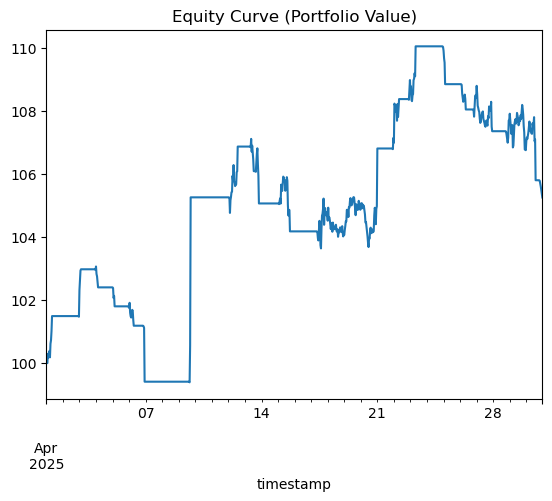

Start                         2025-04-01 00:00:00
End                           2025-04-30 23:15:00
Period                           30 days 00:00:00
Start Value                                 100.0
End Value                              105.247806
Total Return [%]                         5.247806
Benchmark Return [%]                    13.825025
Max Gross Exposure [%]                      100.0
Total Fees Paid                          0.819466
Max Drawdown [%]                         4.367823
Max Drawdown Duration             8 days 13:30:00
Total Trades                                   20
Total Closed Trades                            19
Total Open Trades                               1
Open Trade PnL                          -0.548596
Win Rate [%]                            36.842105
Best Trade [%]                           5.899393
Worst Trade [%]                          -1.75985
Avg Winning Trade [%]                    2.275409
Avg Losing Trade [%]                    -0.832432


In [21]:
#APRILL 2025 BACKTEST



import numpy as np
import pandas as pd
import vectorbt as vbt
import matplotlib.pyplot as plt

df=pd.read_csv(r"C:\Users\HP 840 G4 TOUCH\Downloads\BTCUSDT-aggTrades-2025-04.zip")
#print(df.head())

df["timestamp"]=pd.to_datetime(df["transact_time"], unit="ms")
df["side"]=np.where(df['is_buyer_maker'],'SELL','BUY')
df=df.set_index('timestamp')
window='45min'
agg=df.groupby(pd.Grouper(freq=window)).agg({
    'price':'last',
    'quantity':'sum'
                                             })

#imbalance for the window
imbalance_list=[]
for t,group in df.groupby(pd.Grouper(freq=window)):
    if group.empty:
        imbalance_list.append(np.nan)
        continue
    buys=group.loc[group['side']=='BUY','quantity'].sum()
    sells=group.loc[group['side']=='SELL','quantity'].sum()
    total= buys+ sells
    if total == 0:
        imbalance=0
    else:
        imbalance=(buys-sells)/total * 100
    imbalance_list.append(imbalance)

agg['imbalance']= imbalance_list

#generating entry signals
long_entries= (agg['imbalance']> 20) #& (total>3000)
#short_entries= (agg['imbalance']< -40) #& (total>3000)

#price series
price = agg['price'].ffill()

#run backtest
pf=vbt.Portfolio.from_signals(
    close=price,
    entries=long_entries,
    #short_entries=short_entries,
    size=1.0,

    fees=0.0002,
    sl_stop=0.005,
    tp_stop=0.015
)
pf.value().plot(title="Equity Curve (Portfolio Value)")
plt.show()
print(pf.stats())


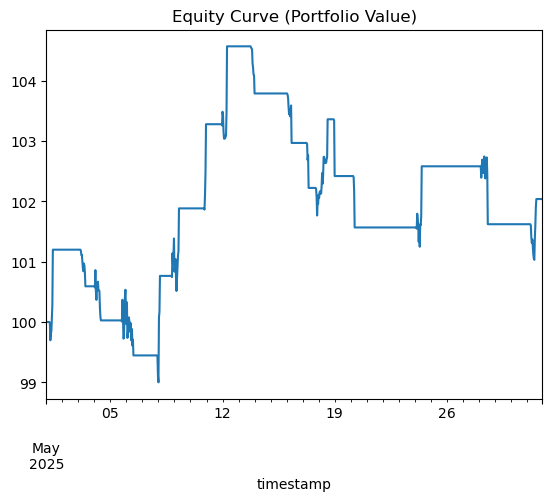

Start                         2025-05-01 00:00:00
End                           2025-05-31 23:15:00
Period                           31 days 00:00:00
Start Value                                 100.0
End Value                              102.036847
Total Return [%]                         2.036847
Benchmark Return [%]                    10.935353
Max Gross Exposure [%]                      100.0
Total Fees Paid                          0.733733
Max Drawdown [%]                          3.38255
Max Drawdown Duration            18 days 05:15:00
Total Trades                                   18
Total Closed Trades                            18
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                            44.444444
Best Trade [%]                           1.368856
Worst Trade [%]                         -0.935536
Avg Winning Trade [%]                    1.167417
Avg Losing Trade [%]                    -0.724049


In [25]:
#BACKTEST FOR JUNE 2025


import numpy as np
import pandas as pd
import vectorbt as vbt
import matplotlib.pyplot as plt

df=pd.read_csv(r"C:\Users\HP 840 G4 TOUCH\Downloads\BTCUSDT-aggTrades-2025-05.zip")
#print(df.head())

df["timestamp"]=pd.to_datetime(df["transact_time"], unit="ms")
df["side"]=np.where(df['is_buyer_maker'],'SELL','BUY')
df=df.set_index('timestamp')
window='45min'
agg=df.groupby(pd.Grouper(freq=window)).agg({
    'price':'last',
    'quantity':'sum'
                                             })

#imbalance for the window
imbalance_list=[]
for t,group in df.groupby(pd.Grouper(freq=window)):
    if group.empty:
        imbalance_list.append(np.nan)
        continue
    buys=group.loc[group['side']=='BUY','quantity'].sum()
    sells=group.loc[group['side']=='SELL','quantity'].sum()
    total= buys+ sells
    if total == 0:
        imbalance=0
    else:
        imbalance=(buys-sells)/total * 100
    imbalance_list.append(imbalance)

agg['imbalance']= imbalance_list

#generating entry signals
long_entries= (agg['imbalance']> 23) #& (total>3000)
#short_entries= (agg['imbalance']< -40) #& (total>3000)

#price series
price = agg['price'].ffill()

#run backtest
pf=vbt.Portfolio.from_signals(
    close=price,
    entries=long_entries,
    #short_entries=short_entries,
    size=1.0,

    fees=0.0002,
    sl_stop=0.005,
    tp_stop=0.01
)
pf.value().plot(title="Equity Curve (Portfolio Value)")
plt.show()
print(pf.stats())


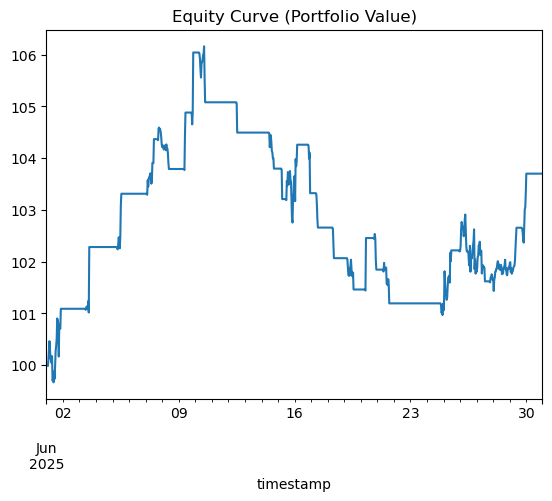

Start                         2025-06-01 00:00:00
End                           2025-06-30 23:15:00
Period                           30 days 00:00:00
Start Value                                 100.0
End Value                              103.699747
Total Return [%]                         3.699747
Benchmark Return [%]                     2.556161
Max Gross Exposure [%]                      100.0
Total Fees Paid                          0.947974
Max Drawdown [%]                          4.89355
Max Drawdown Duration            20 days 10:30:00
Total Trades                                   23
Total Closed Trades                            23
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                            47.826087
Best Trade [%]                           1.181121
Worst Trade [%]                           -0.9079
Avg Winning Trade [%]                    1.046214
Avg Losing Trade [%]                    -0.649042


In [26]:
#BACKTEST FOR JUNE 2025


import numpy as np
import pandas as pd
import vectorbt as vbt
import matplotlib.pyplot as plt

df=pd.read_csv(r"C:\Users\HP 840 G4 TOUCH\Downloads\BTCUSDT-aggTrades-2025-06.zip")
#print(df.head())

df["timestamp"]=pd.to_datetime(df["transact_time"], unit="ms")
df["side"]=np.where(df['is_buyer_maker'],'SELL','BUY')
df=df.set_index('timestamp')
window='45min'
agg=df.groupby(pd.Grouper(freq=window)).agg({
    'price':'last',
    'quantity':'sum'
                                             })

#imbalance for the window
imbalance_list=[]
for t,group in df.groupby(pd.Grouper(freq=window)):
    if group.empty:
        imbalance_list.append(np.nan)
        continue
    buys=group.loc[group['side']=='BUY','quantity'].sum()
    sells=group.loc[group['side']=='SELL','quantity'].sum()
    total= buys+ sells
    if total == 0:
        imbalance=0
    else:
        imbalance=(buys-sells)/total * 100
    imbalance_list.append(imbalance)

agg['imbalance']= imbalance_list

#generating entry signals
long_entries= (agg['imbalance']> 22) #& (total>3000)
#short_entries= (agg['imbalance']< -40) #& (total>3000)

#price series
price = agg['price'].ffill()

#run backtest
pf=vbt.Portfolio.from_signals(
    close=price,
    entries=long_entries,
    #short_entries=short_entries,
    size=1.0,

    fees=0.0002,
    sl_stop=0.005,
    tp_stop=0.01
)
pf.value().plot(title="Equity Curve (Portfolio Value)")
plt.show()
print(pf.stats())


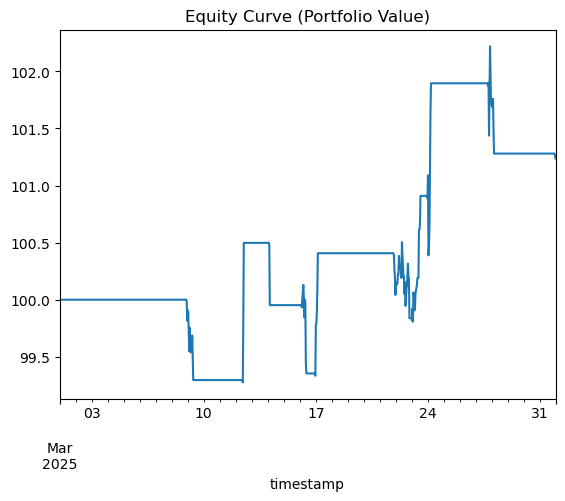

Start                         2025-03-01 00:00:00
End                           2025-03-31 23:15:00
Period                           31 days 00:00:00
Start Value                                 100.0
End Value                               101.23745
Total Return [%]                          1.23745
Benchmark Return [%]                    -1.913645
Max Gross Exposure [%]                      100.0
Total Fees Paid                          0.381368
Max Drawdown [%]                         1.158039
Max Drawdown Duration             8 days 06:45:00
Total Trades                                   10
Total Closed Trades                             9
Total Open Trades                               1
Open Trade PnL                          -0.042458
Win Rate [%]                            44.444444
Best Trade [%]                           1.210622
Worst Trade [%]                          -0.70409
Avg Winning Trade [%]                    1.080413
Avg Losing Trade [%]                    -0.603417


In [27]:
#BACKTEST FOR JULY 2025


import numpy as np
import pandas as pd
import vectorbt as vbt
import matplotlib.pyplot as plt

df=pd.read_csv(r"C:\Users\HP 840 G4 TOUCH\Downloads\BTCUSDT-aggTrades-2025-03.zip")
#print(df.head())

df["timestamp"]=pd.to_datetime(df["transact_time"], unit="ms")
df["side"]=np.where(df['is_buyer_maker'],'SELL','BUY')
df=df.set_index('timestamp')
window='45min'
agg=df.groupby(pd.Grouper(freq=window)).agg({
    'price':'last',
    'quantity':'sum'
                                             })

#imbalance for the window
imbalance_list=[]
for t,group in df.groupby(pd.Grouper(freq=window)):
    if group.empty:
        imbalance_list.append(np.nan)
        continue
    buys=group.loc[group['side']=='BUY','quantity'].sum()
    sells=group.loc[group['side']=='SELL','quantity'].sum()
    total= buys+ sells
    if total == 0:
        imbalance=0
    else:
        imbalance=(buys-sells)/total * 100
    imbalance_list.append(imbalance)

agg['imbalance']= imbalance_list

#generating entry signals
long_entries= (agg['imbalance']> 22) #& (total>3000)
#short_entries= (agg['imbalance']< -40) #& (total>3000)

#price series
price = agg['price'].ffill()

#run backtest
pf=vbt.Portfolio.from_signals(
    close=price,
    entries=long_entries,
    #short_entries=short_entries,
    size=1.0,

    fees=0.0002,
    sl_stop=0.005,
    tp_stop=0.01
)
pf.value().plot(title="Equity Curve (Portfolio Value)")
plt.show()
print(pf.stats())
